### 1. 什么是极大似然估计

- **概念**：假设从总体样本中，独立抽出n个样本X1, X2, X3 ... Xn。极大似然估计则是根据已经抽取的n个样本，来估计一个 (组) 参数值，使得已实现的样本值发生概率最大。应用：通过样本数据来确定参数。
- **数学实现** : ```L(X;θ) = ∏n i=1 f(Xi;θ)```    
We want the value of θ that maximizes LL. We can accomplish this by taking the first derivative (or gradient) of L with respect to θ, setting it to zero and solving for θ. However, this is more easily accomplished if we first take log⁡(L), as L is a product of densities, and taking the log of a product yields a sum. Because log is a monotonically increasing function, any value of θ that maximizes log⁡(L) also maximizes L.  
- **背景知识点**
 - 极大极小问题 optimization problems 
   - 视频：[khan 多变量微积分](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction ) | [MIT 多变量微积分](http://open.163.com/movie/2010/8/R/1/M6TUC9K75_M6TUHRTR1.html)   
     - 对于x，y，z而言，y为一个常数时，y平面固定，x和z才能找到一个极值。相当于分平面找到最小值。
     - 某一点p，让所有变量的偏导数为0，这个点被称作critical point，临界点。在这一点解决极大极小值问题。
   - 联系点：最小二乘法 –– 找到临界点，使误差平方和最小，即极小值问题的应用
   - 极大极小问题的背景知识点
     - 偏导数 partial derivatives 对一个变量求导的时候，把其他变量看作常数
- **进行极大似然估计的前提**：
 - 独立取样，抽样不可重合
 - 服从正态分布
- **加深理解**
 - 视频 ：[Stanford PGM](https://class.coursera.org/pgm-003/lecture/78)
 - blog总结
   - http://blog.csdn.net/bingduanlbd/article/details/24384771    
   估计高斯 (正态) 分布参数的例子
   - http://blog.csdn.net/acema/article/details/38053005   
   极大似然估计是最大可能性估计，但不是无偏估计
   - http://blog.csdn.net/zouxy09/article/details/8537620  
   极大似然估计：通过若干次试验，观察实验结果，推出参数的大概值。某个参数能使样本出现的概率最大，于是不再选择其他小概率样本，而是采用这个目前最大值。
- **Python实现**   
   - ipynb : [How to compute Maximum Likelihood Estimates (MLE) for different distribution](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/parameter_estimation_techniques/max_likelihood_est_distributions.ipynb?create=1)
 

### 2. 上证综指过去一年的日收益率序列及其描述性统计量

#### (1) 数据获取与初探

In [23]:
import numpy as np
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas_datareader.data as web
from datetime import *
from scipy import stats
from scipy.stats import norm, lognorm

In [24]:
start = datetime(2015, 5, 1)
end = datetime(2016, 6, 1)
f = web.DataReader('000001.SS', 'yahoo', start, end)
f.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-04,4480.46,4480.46,4480.46,4480.46,0,4480.46
2015-05-05,4298.71,4298.71,4298.71,4298.71,0,4298.71
2015-05-06,4229.27,4229.27,4229.27,4229.27,0,4229.27
2015-05-07,4112.21,4112.21,4112.21,4112.21,0,4112.21
2015-05-08,4205.92,4205.92,4205.92,4205.92,0,4205.92


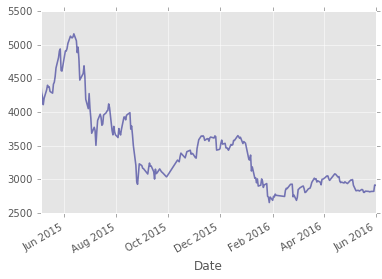

In [25]:
f['Close'].plot(alpha = 0.5, color = 'navy', linewidth = 1.6)

#### (2) 计算日收益率
这里用到了比较常用的对数收益率方法     
一篇文献 [link](http://www.sendsms.cn/download/%C9%CF%D6%A4%D6%B8%CA%FD%CA%D5%D2%E6%C2%CA%B5%C4%CC%D8%D5%F7%BC%B0%C6%E4%B2%A8%B6%AF%D0%D4%B7%D6%CE%F6.pdf)
 

```R (t) = In Pt - In P(t - 1)
```    
#### 计算收益率时，为什么取对数   
https://youtu.be/PtoUlt3V0CI

In [26]:
f['return'] = (np.log(f[1:]) - np.log(f[:-1].values))['Close']*100
f = f.dropna()

In [27]:
f.head()

,Open,High,Low,Close,Volume,Adj Close,return
Date,,,,,,,
2015-05-05,4298.71,4298.71,4298.71,4298.71,0,4298.71,-4.141074
2015-05-06,4229.27,4229.27,4229.27,4229.27,0,4229.27,-1.628558
2015-05-07,4112.21,4112.21,4112.21,4112.21,0,4112.21,-2.806880
2015-05-08,4205.92,4205.92,4205.92,4205.92,0,4205.92,2.253246
2015-05-11,4333.58,4333.58,4333.58,4333.58,0,4333.58,2.990093


In [28]:
f = f.sort_values(by = 'return')

#### (3) 描述性统计量

In [29]:
lr = f['return']
stat_d = dict(lr.describe())
stat_describe = pd.DataFrame([stat_d[x] for x in stat_d], index = [stat_d.keys()], columns = ['Value']).T
stat_describe['var'], stat_describe['skew'], stat_describe['kurt'] = [np.var(lr), stats.skew(lr), \
                                                                      stats.kurtosis(lr)]
stat_describe

,count,std,min,max,50%,25%,75%,mean,var,skew,kurt
Value,250.0,2.595523,-8.872906,7.412341,0.0585,-1.289559,1.436783,-0.172147,6.709794,-0.742701,1.537557


#### (4) 直方图

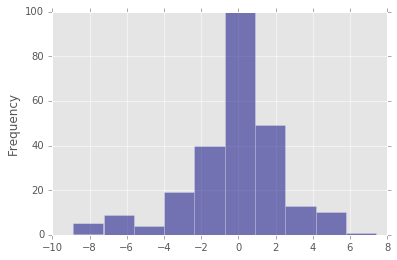

In [30]:
lr.plot.hist(alpha = 0.5, color = 'navy')

### 3. 估计概率密度函数及计算收益率小于0的概率

#### (1) 参数估计 － 正态分布
已知一组日收益序列数据，求概率密度函数，即求参数μ，σ    
#### 实现步骤   
- get data
- fit a normal distribution to the data
- plot the pdf

#### ⚠ 注意 ：画概率密度函数前，务必从小到大排列 x 值
一开始没有从小到大排列 Log—return，matplotlib 画出来的图不是平滑的曲线

µ =  -0.172146871934 , σ =  2.59032694814


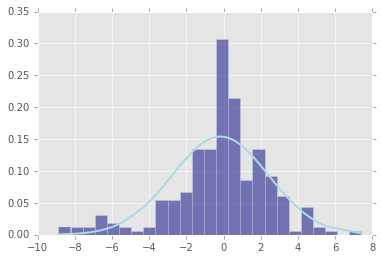

In [31]:
para = norm.fit(f['return'])
f['norm_pdf'] = norm.pdf(f['return'], para[0], para[1])
plt.hist(f['return'], bins=25, normed=True, alpha=0.5, color='navy')
plt.plot(f['return'], f['norm_pdf'], color = 'lightblue', linewidth = 2)
print 'µ = ', para[0], ', σ = ', para[1]

#### 求收益率小于0的概率
求 x 在区间 [a, b] 时的概率，[两个方法](https://www.youtube.com/watch?v=ce3kUWkY9IY)：
- pdf： x置于 [a, b] 区间时，概率为密度曲线对应的面积，即定积分
- cdf： f(b) - f(a)     


因此，要求日收益率在 x < 0 时的概率，求cdf在f(0)时的数值就可以了   
图中红色虚线的长度即为x小于0时的概率

prob = 0.526493237142


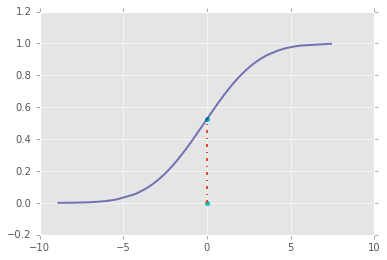

In [67]:
f['norm_cdf'] = norm.cdf(f['return'], para[0], para[1])
plt.plot(f['return'], f['norm_cdf'], alpha = 0.5, color = 'navy', linewidth = 2)

norm_para = stats.norm(para[0], para[1])
x = norm_para.cdf(0)

plt.scatter(0,0, marker = 'o', color = 'c')
plt.scatter(0,x, marker = 'o', color = 'c')
plt.plot([0,0], [0, x], ls = '-.', linewidth = 2)

print 'prob =', x

#### (2) 参数估计 － 对数正态分布 

```
lognorm fit parameter: mean μ = log(scale), std σ = shape
```

μ ＝  -0.0458506116394 , σ ＝  1.19736254428


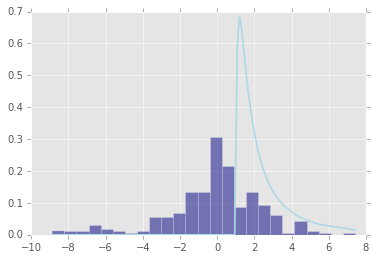

In [33]:
shape, loc, scale = stats.lognorm.fit(f['return'], floc=0)
f['log_pdf'] = lognorm.pdf(f['return'], shape, scale)

plt.hist(f['return'], bins=25, normed=True, alpha=0.5, color='navy')
plt.plot(f['return'], f['log_pdf'], linewidth = 1.6, color = 'lightblue',)

print 'μ ＝ ', np.log(scale), ', σ ＝ ', shape

画出了 cdf 图，但这里似乎不能求 x < 0 时的概率诶

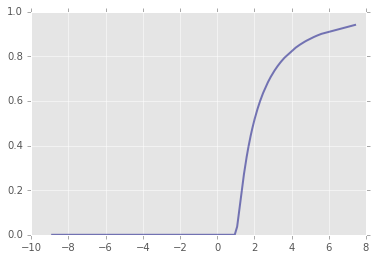

In [34]:
f['log_cdf'] = lognorm.cdf(f['return'], shape, scale)
plt.plot(f['return'], f['log_cdf'], alpha = 0.5, color = 'navy', linewidth = 2)

#### (3) 非参估计 － scipy实现 － scipy.stats.gaussian_kde 
- Kernel density estimation is a way to estimate the probability density function (PDF) of a random variable in a non-parametric way.
- 非参估计不依赖任何公式而建立，这里也就没有提前估计 μ 和 σ
- 改变bandwidth，曲线形状也会发生改变 : bw值越接近1，曲线越平滑

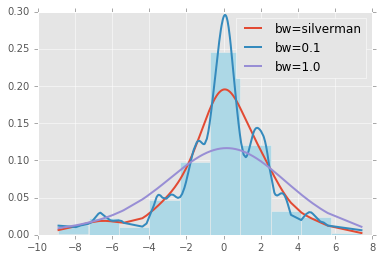

In [66]:
for bandwidth in ['silverman', 0.1, 1.0]:
    kernel = stats.kde.gaussian_kde(f['return'], bw_method = bandwidth)
    plt.plot(f['return'], kernel(f['return']), label='bw={0}'.format(bandwidth), linewidth=2)
plt.hist(f['return'], normed=True, color = 'lightblue')
plt.legend()

#### 求收益率小于0的概率
- scipy.stats.gaussian_kde 自带一个求概率密度函数定积分的方法 : integrate_box_1d(low, high)
- 用非参数法求日收益率在 x < 0 时的概率，可以考虑求 pdf 的定积分，即求 kernel 曲线在 [ f['return'] , 0] 之间的定积分    
＃f ['return'] 已经从大到小排列过了，最小值即 f ['return'][0]

In [36]:
kernel.integrate_box_1d(f['return'][0], 0)

0.48602056480731304

### 4.  两支股票的平均收益率比较 
🌰 索尼和微软在 2016 年 2 月 1 日到 4 月 20 日时间段内的日平均收益率比较

In [252]:
start = datetime(2016, 2, 1)
end = datetime(2016, 4, 20)
s = web.DataReader('SNE', 'yahoo', start, end)
m = web.DataReader('MSFT', 'yahoo', start, end)
ms = pd.DataFrame({'SNE':s['Close'], 'MSFT':m['Close']})
ms[0:5]

,MSFT,SNE
Date,,
2016-02-01,54.709999,23.309999
2016-02-02,53.000000,22.389999
2016-02-03,52.160000,22.030001
2016-02-04,52.000000,22.080000
2016-02-05,50.160000,21.730000


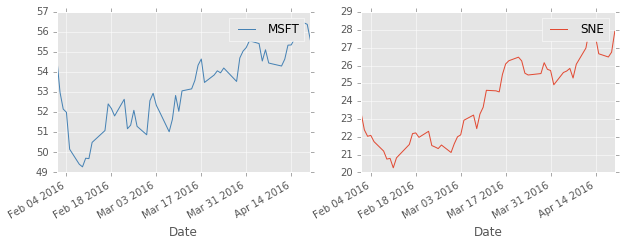

In [253]:
plt.subplots(figsize = (10,7))
plt.subplot(221)
ms['MSFT'].plot(color = 'steelblue')
plt.legend()
plt.subplot(222)
ms['SNE'].plot()
plt.legend()

#### (1) 计算日收益序列

In [254]:
ms['SNE_lr'] = (np.log(ms[1:]) - np.log(ms[:-1].values))['SNE']*100
ms['MSFT_lr'] = (np.log(ms[1:]) - np.log(ms[:-1].values))['MSFT']*100
ms = ms.dropna()
ms = ms.sort_values(by = 'MSFT_lr')
ms.head()

,MSFT,SNE,SNE_lr,MSFT_lr
Date,,,,
2016-02-05,50.160000,21.730000,-1.597843,-3.602582
2016-02-02,53.000000,22.389999,-4.026802,-3.175458
2016-02-23,51.180000,21.510000,-3.651702,-2.831745
2016-03-18,53.490002,26.270000,0.687550,-2.163742
2016-03-07,51.029999,23.219999,1.256784,-1.940678


In [255]:
ms2 = ms.sort_values(by = 'SNE_lr')
ms2.head()

,MSFT,SNE,SNE_lr,MSFT_lr
Date,,,,
2016-02-02,53.000000,22.389999,-4.026802,-3.175458
2016-02-23,51.180000,21.510000,-3.651702,-2.831745
2016-04-15,55.650002,26.660000,-3.501375,0.522478
2016-03-08,51.650002,22.459999,-3.327803,1.207656
2016-04-01,55.570000,24.920000,-3.159817,0.613720


In [256]:
ms.describe()

,MSFT,SNE,SNE_lr,MSFT_lr
count,55.000000,55.000000,55.000000,55.000000
mean,53.103091,24.017636,0.328111,0.029012
std,1.879029,2.308769,2.265555,1.442400
min,49.279999,20.260000,-4.026802,-3.602582
25%,51.910000,21.985000,-1.511155,-0.980849
50%,53.070000,24.520000,0.311891,0.188249
75%,54.605002,25.955000,2.290468,0.944969
max,56.459999,28.100000,4.280880,3.286592


#### (2) 假设检验 SNE 和 MSFT 的平均收益率是否有显著差别

前提：SNE 与 MSFT 数据具有独立性 (已满足)；SNE 和 MSFT 数据服从正态分布 
- t 检验的前提条件－正态分布：
    - 配对设计：每对数据的差值必须服从正态分布
    - 成组设计：个体之间相互独立，两组资料均取自正态分布的总体，并满足方差齐性
    - 原因：在满足前提下计算出的 t 统计量才服从 t 分布，而 t 检验是以 t 分布作为其理论依据的检验方法
- 正态分布检验 Shapiro-Wilk test : 
  - 原假设：SNE 和 MSFT 在 2016 年 2 月 1 日到 4 月 20 日时间段内的日收益率满足正态分布
  - 结果：两个样本的Shapiro-Wilk test p 值都大于 0.05，无法拒绝原假设
  - 结论：SNE 和 MSFT 在 2016 年 2 月 1 日到 4 月 20 日时间段内的日收益率满足正态分布

In [258]:
stats.shapiro(ms.MSFT_lr)

(0.9870468378067017, 0.8162753582000732)

In [257]:
stats.shapiro(ms.SNE_lr)

(0.9681004881858826, 0.1511414796113968)

#### T 检验
- 原假设：在 2016 年 2 月 1 日到 2016 年 4 月 20 日之间， SNE 和 MSFT 的平均收益率没有显著差别
- 结果：p ＝ 0.411 > 0.05, 无法拒绝原假设
- 结论：在 2016 年 2 月 1 日到 2016 年 4 月 20 日之间， SNE 和 MSFT 的平均收益率没有显著差别

In [260]:
stats.ttest_ind(ms.SNE_lr, ms.MSFT_lr)

Ttest_indResult(statistic=0.82590390418118032, pvalue=0.41067935629146146)

#### 画图来看一下

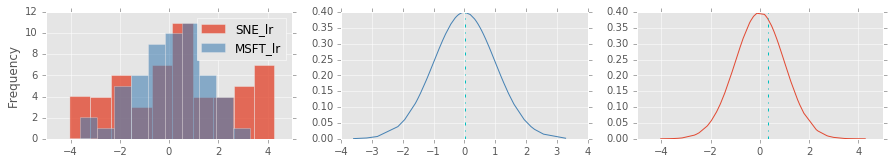

In [273]:
plt.subplots(figsize=(15, 5))
plt.subplot(231)
ms.SNE_lr.plot.hist(alpha = 0.8)
ms.MSFT_lr.plot.hist(alpha = 0.6, color = 'steelblue')
plt.legend()
plt.subplot(232)
plt.plot(ms.MSFT_lr, norm.pdf(ms.MSFT_lr), color = 'steelblue')
plt.axvline(ms.MSFT_lr.mean(), color = 'c', ls= '-.')
plt.subplot(233)
plt.plot(ms2.SNE_lr, norm.pdf(ms2.SNE_lr))
plt.axvline(ms.SNE_lr.mean(), color = 'c', ls= '-.')

### 4. 其他练习与笔记

#### (1) T检验的其他应用
#### 1-sample t test － 检测某一个数值有没有可能是总体期望  
  - 🌰 检测MSFT的均值
      - 原假设：0 是 MSFT_lr 的均值   
      - 检测 0 是否为 MSFT_lr 的均值，p值为 0.882，远大于 0.05，无法拒绝原假设

In [327]:
stats.ttest_1samp(ms['MSFT_lr'], 0)

Ttest_1sampResult(statistic=0.14916946536154618, pvalue=0.88197562212014635)

#### Paired t tests － 在不同时间对同一主体进行测量，得到两个样本，检测两个样本是否有显著差异  
🌰  IBM 在 2015 年 8 月 1 日到 12 月 1 日时间段内的日收益率，与在 2016 年 1 月 1 日到 5 月 4 日时间段内的日收益率比较

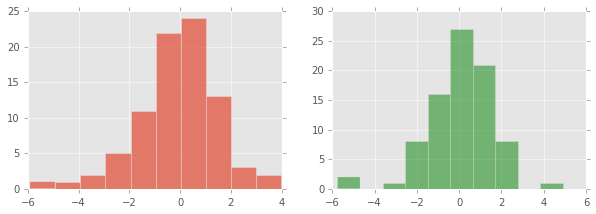

In [328]:
start = datetime(2015, 8, 1)
end = datetime(2015, 12, 1)
i1 = web.DataReader('IBM', 'yahoo', start, end)

start = datetime(2016, 1, 1)
end = datetime(2016, 5, 4)
i2 = web.DataReader('IBM', 'yahoo', start, end)

i1['lr'] = (np.log(i1[1:]) - np.log(i1[:-1].values))['Close']*100
i1 = i1.dropna()
i2['lr'] = (np.log(i2[1:]) - np.log(i2[:-1].values))['Close']*100
i2 = i2.dropna()

plt.subplots(figsize = (10,7))
plt.subplot(221)
i1['lr'].hist(alpha = 0.7)
plt.subplot(222)
i2['lr'].hist(alpha = 0.5, color = 'g')

- Paired t tests 前提
    - 数据从两个不同时间段内抽取，满足独立性要求
    - 两组样本差值的 shapiro wilk test p值为0.451，大于0.05， 满足正态分布要求

In [326]:
stats.shapiro(list(i2['lr']) - (i1['lr']))

(0.9852026104927063, 0.4513116776943207)

- Paired t tests
    - 原假设：IBM 在 2015 年 8 月 1 日到 12 月 1 日之间的日收益率，与在 2016 年 1 月 1 日到 5 月 4 日之间的日收益率没有显著差异 
    - 结果：p 值为 0.37，大于 0.05，无法拒绝原假设
    - 结论：IBM 在 2015 年 8 月 1 日到 12 月 1 日之间的日收益率，与在 2016 年 1 月 1 日到 5 月 4 日之间的日收益率没有显著差异 

In [297]:
stats.ttest_rel(i1['lr'], i2['lr']) 

Ttest_relResult(statistic=-0.89669593927436841, pvalue=0.37247468941653805)

#### (2) 非参数估计 概率密度函数 － statsmodel 实现
- 数据：上证综指 2015 年 5 月 1 日到 2016 年 6 月 1 日收益率
- 非参数方法估计日收益率的概率密度函数

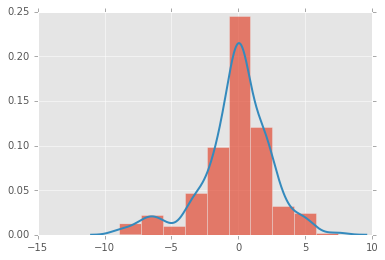

In [277]:
import statsmodels.api as sm
kernel = sm.nonparametric.KDEUnivariate(f['return'])
kernel.fit()
plt.hist(f['return'], normed=True, alpha = 0.7)
plt.plot(kernel.support, kernel.density, lw =2)

- 估计 x 在某一点处的概率密度 ```evaluate(point)```    
🌰：日收益率在 5% 时的概率

In [278]:
kernel.evaluate(5)

array([ 0.01937216])

- 画出 CDF 图

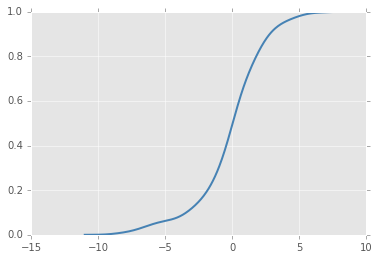

In [279]:
plt.plot(kernel.support, kernel.cdf, lw=2, c='steelblue')

#### (3) 笔记
#### 日收益率 直方图 描述性统计概念
- 怎么计算日收益率？logarithmic returns
 - 对数日收益率
     - rt is the log return, rt = ln (pt/pt1) = ln (1 + Rt)
     - Similar in magnitude to Rt if Rt close to zero
     - Rt = 0.05, rt = 0.0488
     - Also can say similar in magnitude for ìsmallî changes in price
     - Log return is continuously compounded return
     - Can be viewed as a Taylor series approximation of proportional return around zero
     - [数学证明过程](http://blog.163.com/shyang_li@126/blog/static/952031020094260227810/)
 - 为什么在做实证时股票市场的日收益率都用对数收益率（Rt=ln(Pt/Pt-1）) , 而不是等于(Pt-Pt-1)/Pt-1？ 
     - 在价格序列变动性很小的情况下，对数收益率法和普通计算方法的结果近似相等。根据极限定理，当r无穷小，两者基本无差别。另外，使用对数log处理，一方面可使数据更加平滑，克服数据本身的异方差；另一方面，“ln”处理能够达到价格上涨下降的对称性，即数据的对称性。此外，“ln”的后续处理可以得到一些有用数据，这包括差分后的增长。[原文](http://bbs.pinggu.org/thread-568884-1-1.html)
 - 如何在python中实现？
     - http://stackoverflow.com/questions/31287552/logarithmic-returns-in-pandas-dataframe
- 描述性统计数据
 - Minimum | 25% | Median | 75% | Maximum | Mean | Standard Deviation | Skewness Coefficient | Kurtosis
 
#### 概率密度函数 
- 为什么用分布来表示一组数据
    - 假如数据有多个极端值，一个数据不足以胜任一组数据的描述任务，于是用分布来描述一组数值。
- 定义 : [khan academy video](http://open.163.com/movie/2011/6/H/0/M82IC6GQU_M83JAHTH0.html)
- 正态分布 [scipy manual](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.norm.html)
 - pdf
   - 给定分布值 x，pdf 出来概率密度值 y
 - cdf
   - 累积概率函数，pdf 的积分，密度曲线下的面积
 - interval：
   - 之前求密度函数，给出 x，求出密度曲线上的 y 值。     
   - interval - 当 y 值为 0.95 时，求 x 的区间  
- 对数正态分布 [scipy manual](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.lognorm.html)
- 非参数估计 [scipy manual](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html)
   - 正态分布，用一个公式描述一个随机变量，但前提是分布能拟合数据。  
   - 非参方法，用非公式的方法，来描述随机变量，如核分布。如果用非参方法估计出背后经验分布之后，可以使用经验分布进行进一步抽样。 
   - kde 无累积密度函数, bw_method 双峰分布
 
#### 统计常识
 统计学中为什么要对变量取对数
  - https://www.zhihu.com/question/22012482
  
#### Python stats
- How to estimate probability density function from sample data with Python
 - http://firsttimeprogrammer.blogspot.co.uk/2015/01/how-to-estimate-probability-density.html
- Kernel estimation of probability density functions
 - http://bonsai.hgc.jp/~mdehoon/software/python/Statistics/manual/index.xhtml